In [1]:
import torch
import numpy
import matplotlib.pyplot as plt

In [2]:
X = numpy.random.rand(100, 1)
Y = numpy.random.rand(100, 1)

In [3]:
input_layer = 1
output_layer = 1
learning_rate = 1e-5

def train(hidden_layer: int, epochs: int, print_debug_info: bool = False) -> None:
    device = "cuda" if torch.cuda.is_available() else "cpu"

    x_tensor = torch.tensor(X, device=device, dtype=torch.float64)
    y_tensor = torch.tensor(Y, device=device, dtype=torch.float64)

    weights_layer1 = torch.rand(input_layer, hidden_layer, requires_grad=True, device=device, dtype=torch.float64)
    biases_layer1 = torch.rand(hidden_layer, requires_grad=True, device=device, dtype=torch.float64)
    weights_layer2 = torch.rand(hidden_layer, output_layer, requires_grad=True, device=device, dtype=torch.float64)
    biases_layer2 = torch.rand(output_layer, requires_grad=True, device=device, dtype=torch.float64)

    def predict() -> torch.Tensor:
        return (x_tensor @ weights_layer1 + biases_layer1) @ weights_layer2 + biases_layer2

    for i in range(epochs):
        predicted = predict()
        loss = torch.sum(torch.pow(torch.sub(y_tensor, predicted), 2))

        if print_debug_info:
            iteration_id = i + 1
            if iteration_id % 500 == 0:
                print(f"Info at epoch #{iteration_id}:")
                print(f"Loss: {loss.item()}")

        loss.backward()

        with torch.no_grad():
            weights_layer1 -= learning_rate * weights_layer1.grad
            biases_layer1 -= learning_rate * biases_layer1.grad
            weights_layer2 -= learning_rate * weights_layer2.grad
            biases_layer2 -= learning_rate * biases_layer2.grad

            weights_layer1.grad = None
            biases_layer1.grad = None
            weights_layer2.grad = None
            biases_layer2.grad = None

    final_prediction = numpy.array(predict().detach().cpu())

    plt.title(f"Training a 2D regression model with {hidden_layer} neurons within the hidden layer after {epochs} epochs")
    plt.scatter(X, Y)
    plt.plot(X, final_prediction)
    plt.show()

Info at epoch #500:
Loss: 9.443289533322268
Info at epoch #1000:
Loss: 8.616029180313419
Info at epoch #1500:
Loss: 8.561992873110954
Info at epoch #2000:
Loss: 8.542833793823476
Info at epoch #2500:
Loss: 8.526642805372816
Info at epoch #3000:
Loss: 8.511808020054412
Info at epoch #3500:
Loss: 8.498132057258916
Info at epoch #4000:
Loss: 8.48549857088043
Info at epoch #4500:
Loss: 8.473807549439048
Info at epoch #5000:
Loss: 8.462970622755332


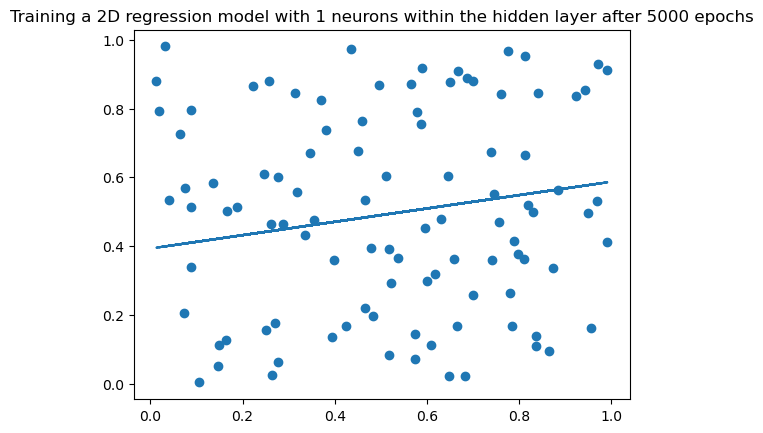

Info at epoch #500:
Loss: 11.495535831100769
Info at epoch #1000:
Loss: 10.574472732772147
Info at epoch #1500:
Loss: 9.935975383908513
Info at epoch #2000:
Loss: 9.4850801107978
Info at epoch #2500:
Loss: 9.162311163824693
Info at epoch #3000:
Loss: 8.92889512941344
Info at epoch #3500:
Loss: 8.75879386415556
Info at epoch #4000:
Loss: 8.634107714133993
Info at epoch #4500:
Loss: 8.542303499829618
Info at epoch #5000:
Loss: 8.47447841816977


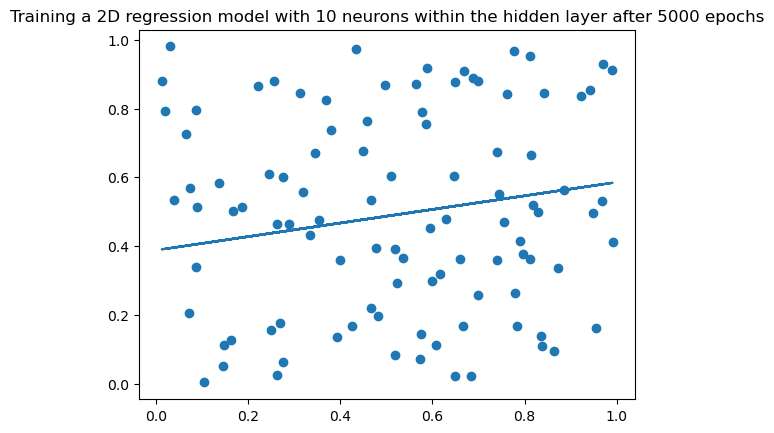

Info at epoch #500:
Loss: 9.749210638767838
Info at epoch #1000:
Loss: 8.324721949490517
Info at epoch #1500:
Loss: 8.279407024590883
Info at epoch #2000:
Loss: 8.27796435814005
Info at epoch #2500:
Loss: 8.277918426157832
Info at epoch #3000:
Loss: 8.277916963752812
Info at epoch #3500:
Loss: 8.277916917191988
Info at epoch #4000:
Loss: 8.277916915709554
Info at epoch #4500:
Loss: 8.277916915662358
Info at epoch #5000:
Loss: 8.277916915660853


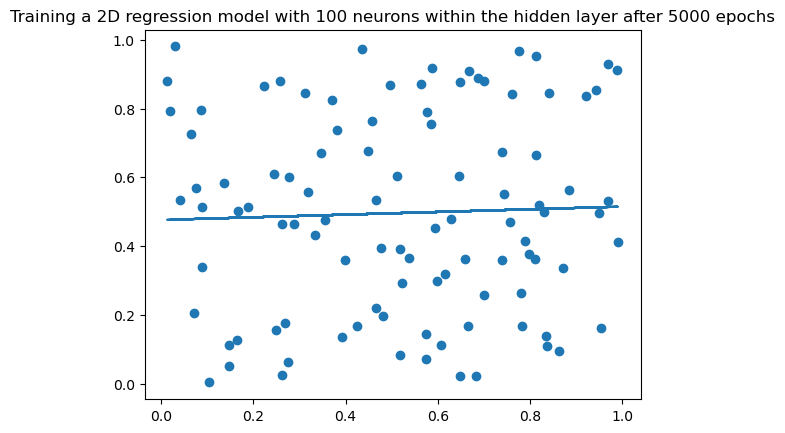

In [4]:
train(1, 5_000, print_debug_info=True)
train(10, 5_000, print_debug_info=True)
train(100, 5_000, print_debug_info=True)
